In [1]:
import urllib.request
from bs4 import BeautifulSoup as bs
import locale
import re
import pandas as pd
import matplotlib as plt
%matplotlib inline 

In [2]:
url = "https://www.youtube.com/channel/UCeo3JwE3HezUWFdVcehQk9Q/videos?sort=p&flow=grid&view=0"
response = urllib.request.urlopen(url)
html_cont = response.read()
soup = bs(html_cont,'html.parser',from_encoding = "UTF-8")
print(soup.prettify())

<!DOCTYPE html>
<html data-cast-api-enabled="true" lang="zh-TW">
 <head>
  <style name="www-roboto" nonce="">
   @font-face{font-family:'Roboto';font-style:normal;font-weight:500;src:local('Roboto Medium'),local('Roboto-Medium'),url(//fonts.gstatic.com/s/roboto/v16/RxZJdnzeo3R5zSexge8UUaCWcynf_cDxXwCLxiixG1c.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:local('Roboto Regular'),local('Roboto-Regular'),url(//fonts.gstatic.com/s/roboto/v16/zN7GBFwfMP4uA6AR0HCoLQ.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:italic;font-weight:500;src:local('Roboto Medium Italic'),local('Roboto-MediumItalic'),url(//fonts.gstatic.com/s/roboto/v16/OLffGBTaF0XFOW1gnuHF0Z0EAVxt0G0biEntp43Qt6E.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:local('Roboto Italic'),local('Roboto-Italic'),url(//fonts.gstatic.com/s/roboto/v16/W4wDsBUluyw0tK3tykhXEfesZW2xOQ-xsNqO47m55DA.ttf)format('truetype');}
  </styl

In [3]:
viewlist = []
infos = soup.find_all("ul" ,class_="yt-lockup-meta-info")
import locale
locale.setlocale(locale.LC_ALL,"en_us.UTF-8")
for info in infos: 
    temp =  re.findall("((\d+,)+\d+)$", info.li.text)[0][0] 
    temp2num = locale.atoi(temp)
    viewlist.append(temp2num)
viewseries =  pd.Series(viewlist)
channelInfo = pd.DataFrame(viewseries,columns=["View"])
channelInfo.head(5)

,View
0,1500003
1,1248680
2,1023342
3,803355
4,765904


In [4]:
channelInfo.describe()

,View
count,3.000000e+01
mean,6.559642e+05
std,2.360924e+05
min,4.489540e+05
25%,4.985680e+05
50%,6.051985e+05
75%,7.073570e+05
max,1.500003e+06


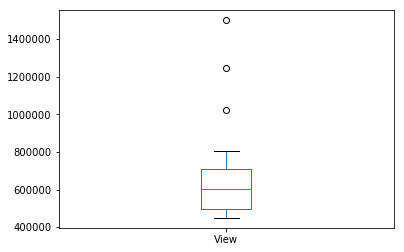

In [5]:
channelInfo.plot.box()

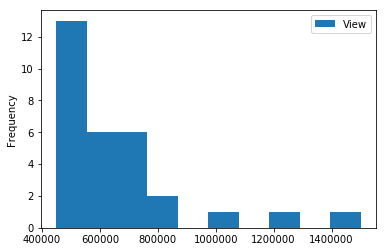

In [6]:
channelInfo.plot.hist()

In [7]:
titleList = []
timeList=[]
urlList=[]
infos = soup.find_all("h3" ,class_="yt-lockup-title")
for info in infos:
    titleList.append(info.a["title"])
    urlList.append(re.findall(r"\?v=(.{11})",info.a["href"])[0])
    m =  int(re.findall("(\d+) 分鐘",info.span.text)[0]) if len(re.findall("(\d+) 分鐘",info.span.text))>0 else 0
    s =  int(re.findall("(\d+) 秒",info.span.text)[0]) if len(re.findall("(\d+) 秒",info.span.text))>0 else 0
    timeList.append(m*60+s)
titleSeries = pd.Series(titleList)
#titleSeries.head()
timeSeries = pd.Series(timeList)
urlSeries = pd.Series(urlList)
#timeSeries.head()
channelInfo["Title"]=titleSeries
channelInfo["Time"]=timeSeries
channelInfo["url"]=urlSeries
channelInfo.head(30)

,View,Title,Time,url
0,1500003,我要離開這個頻道了。,290,lrgCrpJCh34
1,1248680,完整・全解析最有效背單字法 // Comprehensive Method of Vocab...,660,gkVpNq4-wqs
2,1023342,3個訣竅講出一口自然流利英文 // 3 Tips To Sound More Like A ...,393,6JeTQb3YKYY
3,803355,阿滴英文｜挑戰! 你聽得懂日本英文嗎? feat. Ryu & Yuma,780,beRCHzxz7cM
4,765904,阿滴英文｜挑戰15分鐘完勝學測英文考題! 阿滴vs滴妹大對決!,530,l95ey_v5XTg
5,726760,阿滴英文｜史上最簡單的英文猜謎遊戲 feat. 聖結石 聖嫂Dodo,600,Al-cLgpvu_4
6,729241,阿滴英文｜這群人神作超瞎翻唱! 英文翻譯有及格嗎? feat. 展榮展瑞,720,uT4V2fbWFC4
7,712448,開箱! YouTubers 交換禮物大亂鬥 feat. 白癡公主/囧星人/林辰Buchi/壹加壹,452,HlyD08vTju0
8,692084,滴妹翻唱千年之戀 MV // Crown Cover - A Thousand Years MV,299,oeo0m64_iwY
9,689762,阿滴英文｜字典裡居然都有! 跟放火一起學新加坡式英文 feat. 放火,540,VnCZEkl6Cr8


In [8]:
channelInfo.to_csv("Output.csv",encoding='utf-8')